In [105]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


In [72]:
## loading dataset
file_url = "http://18.163.158.193/hko/data.csv"
dataset_fp = tf.keras.utils.get_file(fname='hko.csv',origin=file_url)
## columns name of the dataset
feature_names = [
    'temperature',
    'humidity',
    'pressure',
    'wind_speed',
]

label_name = 'rainfall'
column_names = feature_names + [label_name]

print(f"Features: {feature_names}")
print(f"Label: {label_name}")
print(f"column_names: {column_names}")

Features: ['temperature', 'humidity', 'pressure', 'wind_speed']
Label: rainfall
column_names: ['temperature', 'humidity', 'pressure', 'wind_speed', 'rainfall']


In [73]:
# convert file to df
data_df = pd.read_csv(
    dataset_fp,
    skiprows=1,
    usecols=[2,3,4,5,7],
    names=column_names
)
# 獲取'wind_speed'列等於'"***"'的行索引
index_with_speed_star = data_df[data_df['wind_speed'] == "***"].index
data_df = data_df.drop(index_with_speed_star)

# index_with_pressure_star = data_df[data_df['pressure'] == "***"].index
# data_df = data_df.drop(index_with_pressure_star)

q = data_df[data_df['temperature'] == "***"].index
w = data_df[data_df['humidity'] == "***"].index
e = data_df[data_df['pressure'] == "***"].index
r = data_df[data_df['wind_speed'] == "***"].index

# data_df = data_df.drop(index_with_direction_star)



In [74]:
# Explore the dataset
print(data_df.head())
# print(data_df.describe())

   temperature  humidity  pressure wind_speed  rainfall
0         29.5        77    1004.8        6.4     0.025
1         29.3        79    1004.8        7.4     1.200
2         29.6        78    1004.0        8.5     0.600
3         29.5        80    1003.4         11     0.900
4         29.4        80    1004.8       14.5     1.800


In [75]:
# Prepare the data
X = data_df[feature_names]
y = data_df['rainfall']

In [76]:
y

0        0.025
1        1.200
2        0.600
3        0.900
4        1.800
         ...  
11561    0.000
11562    0.025
11563    0.025
11564    0.025
11565    0.025
Name: rainfall, Length: 11545, dtype: float64

In [77]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [78]:
# Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [79]:

# Make predictions on the test set
y_pred = model.predict(X_test)



In [80]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 374.4670965578891
R-squared: 0.18274810052264534


In [109]:
# Use the model to make a prediction
# new_data = np.array([[28.7, 90, 1010.3, 10.1]])
new_data = pd.DataFrame([[9, 75, 1028.5, 12.1]], columns=feature_names)

rainfall_prediction = model.predict(new_data)
print("Predicted rainfall:", rainfall_prediction[0])

Predicted rainfall: 1.8775465737085142


ValueError: x and y must be the same size

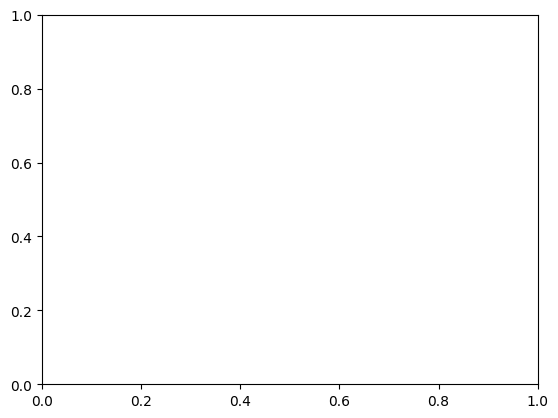